In [ ]:
pip install kneed

#K-means

In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
# Realizar un set de datos artificial
features, true_labels = make_blobs(
   n_samples=200,
   centers=3,
   cluster_std=2.75,
   random_state=42
   )

In [9]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [10]:
true_labels[:5]

array([1, 0, 2, 2, 2])

Estandarizar datos

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [28]:
#Instanciar KMeans
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

El SSE se define como la suma de las distancias euclidianas al cuadrado de cada punto a su centroide más cercano.

SSE sirve como medida del rendimiento del cluster

In [20]:
# The lowest SSE value
print(kmeans.inertia_)

#Final locations of the centroid
print(kmeans.cluster_centers_)


# The number of iterations required to converge
print(kmeans.n_iter_)

74.57960106819854
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
6


In [18]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

Escojer un número apropiado de clusters:

comúnmente se ejecutan varias inicializaciones de todo el algoritmo de k-medias y se eligen las asignaciones de clúster de la inicialización con el SSE más bajo.

In [27]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42 }
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

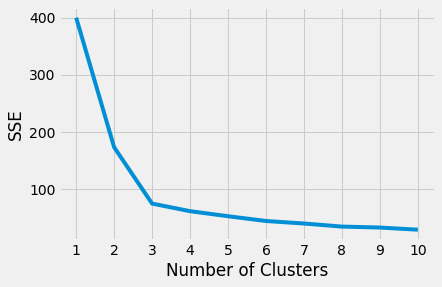

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

El coeficiente de silueta es una medida de la cohesión y separación de los grupos. Cuantifica qué tan bien encaja un punto de datos en su clúster asignado en función de dos factores:

1.   Qué tan cerca está el punto de datos de otros puntos del clúster
2.   Qué tan lejos está el punto de datos de los puntos en otros clústeres 

Los valores del coeficiente de silueta oscilan entre -1 y 1. Los números más grandes indican que las muestras están más cerca de sus grupos que de otros grupos.

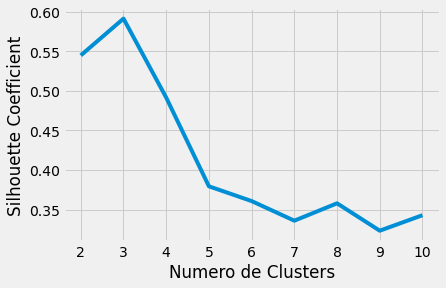

In [29]:
# Una lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []

for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()